# Clase 1 - Semana 6
#### Tópicos Selectos De Matemáticas Aplicadas II: Análisis de Datos con Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lxml

In [2]:
ruta = 'https://raw.githubusercontent.com/jamc88/AD-MCMAI/refs/heads/main/Datos/bestsellers_mexico.xml'
df = pd.read_xml(ruta) 
df.head()

,id,Author,Title,Genre,Price,PublishDate,Description
0,bk1000,Joe Dispenza,Deja De Ser Tú: La mente crea la realidad,Self-Help,213.62,2020-05-01,Título popular en México en 2025.
1,bk1001,James Clear,Hábitos Atómicos,Self-Help,185.40,2018-10-16,Título popular en México en 2025.
2,bk1002,Viktor Frankl,El Hombre En Busca de Sentido,Psychology,169.90,1946-01-01,Título popular en México en 2025.
3,bk1003,Tomás García Cerezo,Descubre a los mejores amigos,Adult Fiction,182.75,2024-11-11,Título popular en México en 2025.
4,bk1004,Mark Wolynn,Este dolor no es mío,Psychology,180.00,2019-09-10,Título popular en México en 2025.


## ¿Qué año tuvo más publicaciones?

In [3]:
df['PublishDate'] = pd.to_datetime(df['PublishDate'])

In [8]:
df['PublishDate'].dt.year

0     2020
1     2018
2     1946
3     2024
4     2019
      ... 
95    2011
96    2016
97    2004
98    2025
99    2017
Name: PublishDate, Length: 100, dtype: int32

In [9]:
df['Year'] = df['PublishDate'].dt.year

In [13]:
df.groupby('Year').size().sort_values(ascending=False)

Year
2023    8
2022    8
2009    7
2017    6
2007    5
2024    4
1996    4
1997    4
2018    4
2012    4
2021    4
2008    4
2014    3
2020    3
2002    3
2004    3
2001    3
1999    3
2016    3
2005    2
2000    2
2019    2
1998    2
1942    1
2015    1
2013    1
2011    1
1943    1
1995    1
1955    1
1946    1
2025    1
dtype: int64

In [15]:
df1 = pd.DataFrame(df.groupby('Year').size().sort_values(ascending=False)
                   ,columns=['Frecuencia'])
df1.head()

,Frecuencia
Year,
2023,8
2022,8
2009,7
2017,6
2007,5


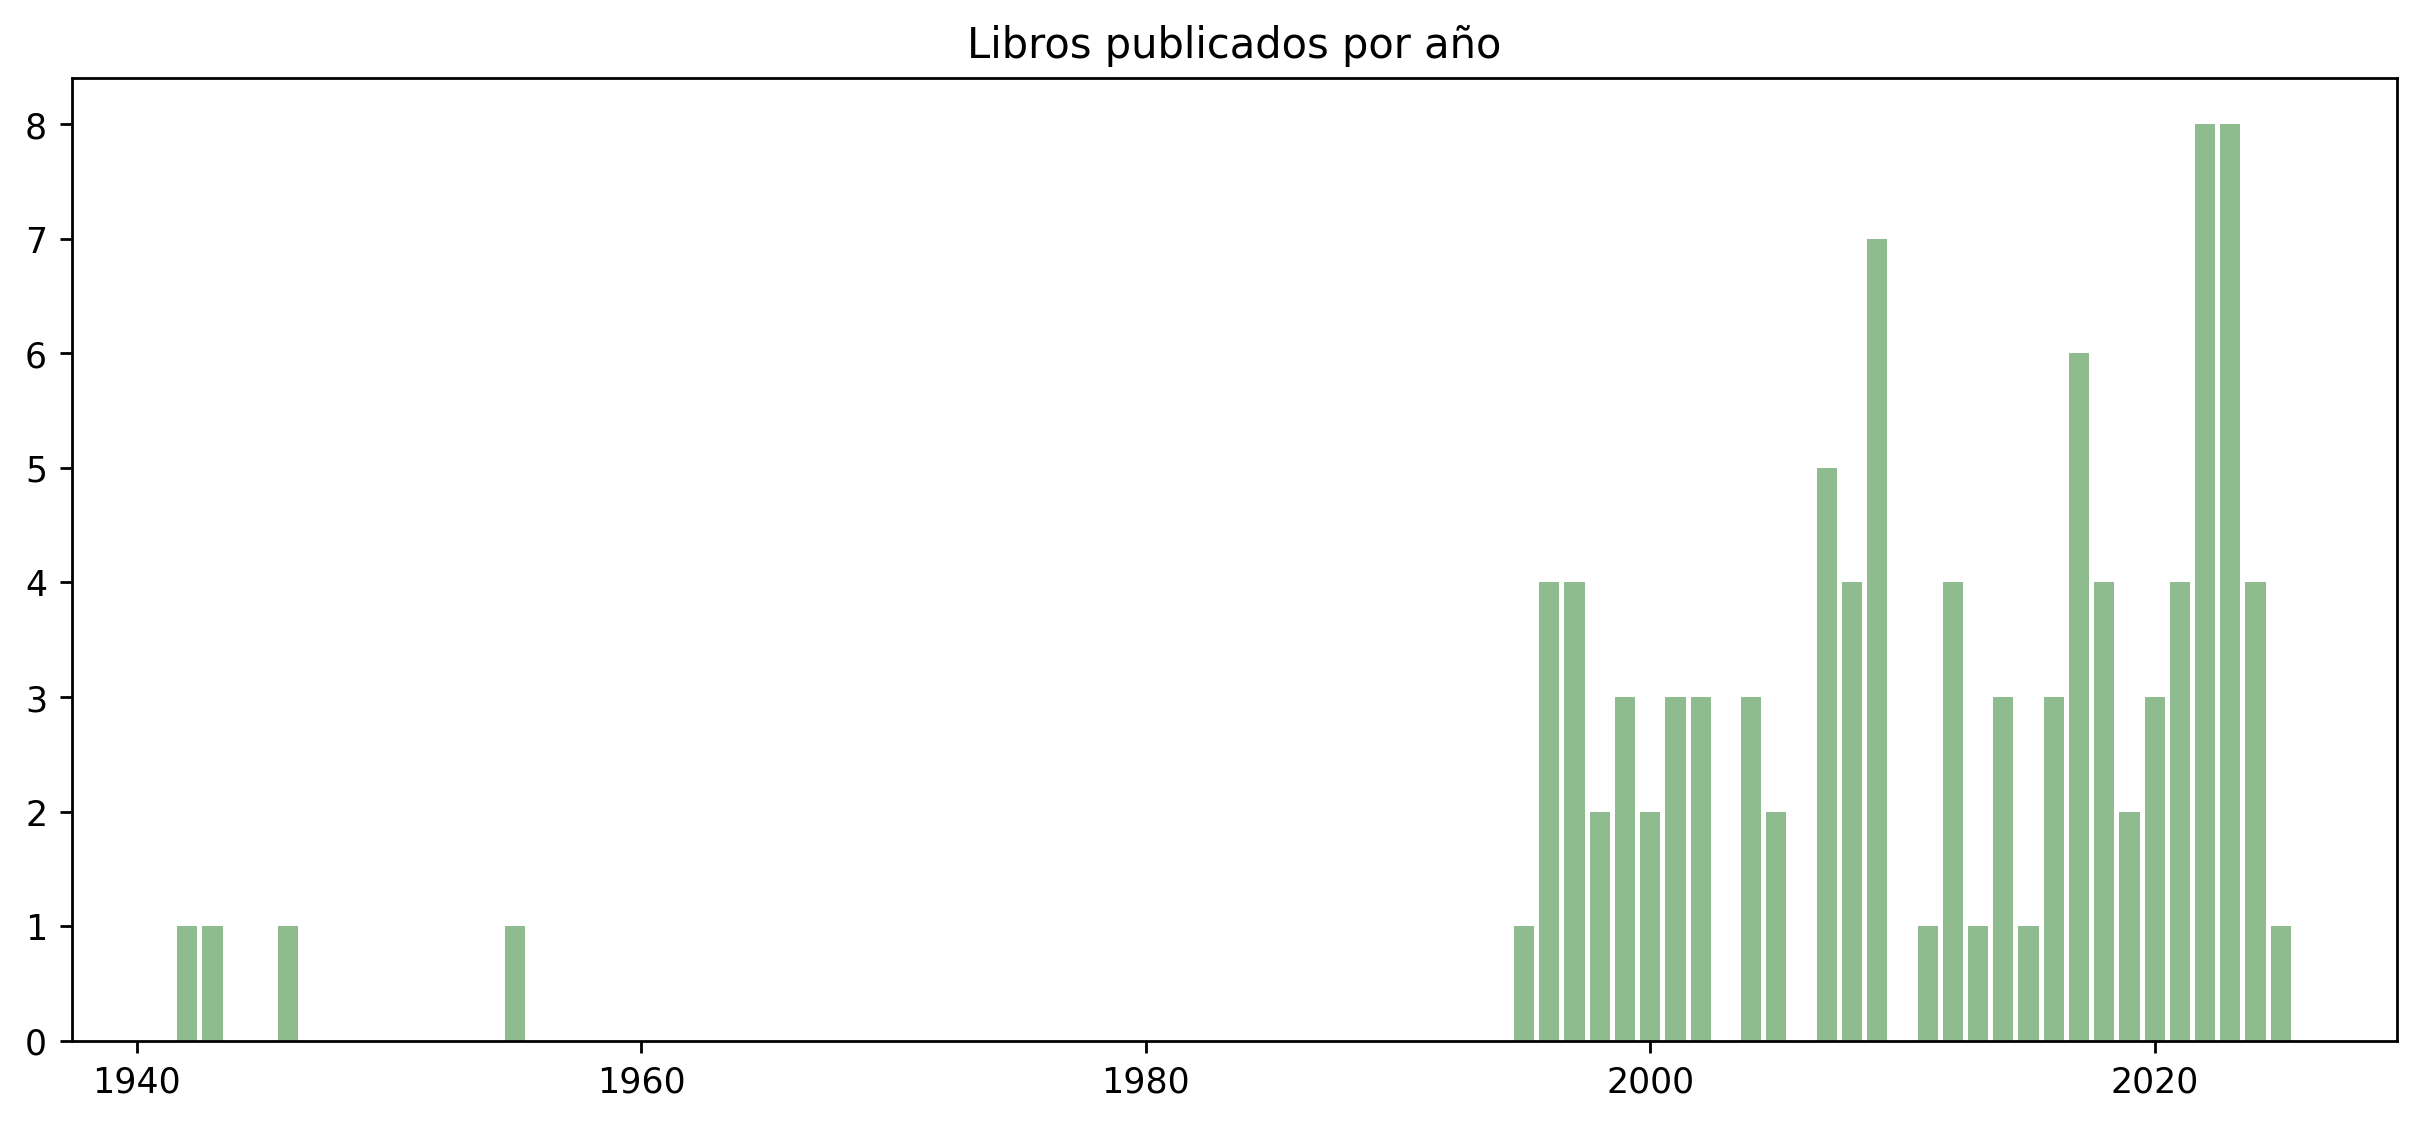

In [17]:
plt.figure(figsize=(12,5), dpi=250) 
plt.bar(df1.index,df1['Frecuencia'], color='darkseagreen')
plt.title('Libros publicados por año')
plt.show()

## ¿Se han encarecido los libros a lo largo del tiempo?

In [18]:
pd.DataFrame(df.groupby('Year')['Price'].mean())

,Price
Year,
1942,134.100000
1943,99.000000
1946,169.900000
1955,120.000000
1995,190.640000
1996,171.220000
1997,186.435000
1998,242.030000
1999,131.743333


In [19]:
df2 = pd.DataFrame(df.groupby('Year')['Price'].mean())
df2.head()

,Price
Year,
1942,134.10
1943,99.00
1946,169.90
1955,120.00
1995,190.64


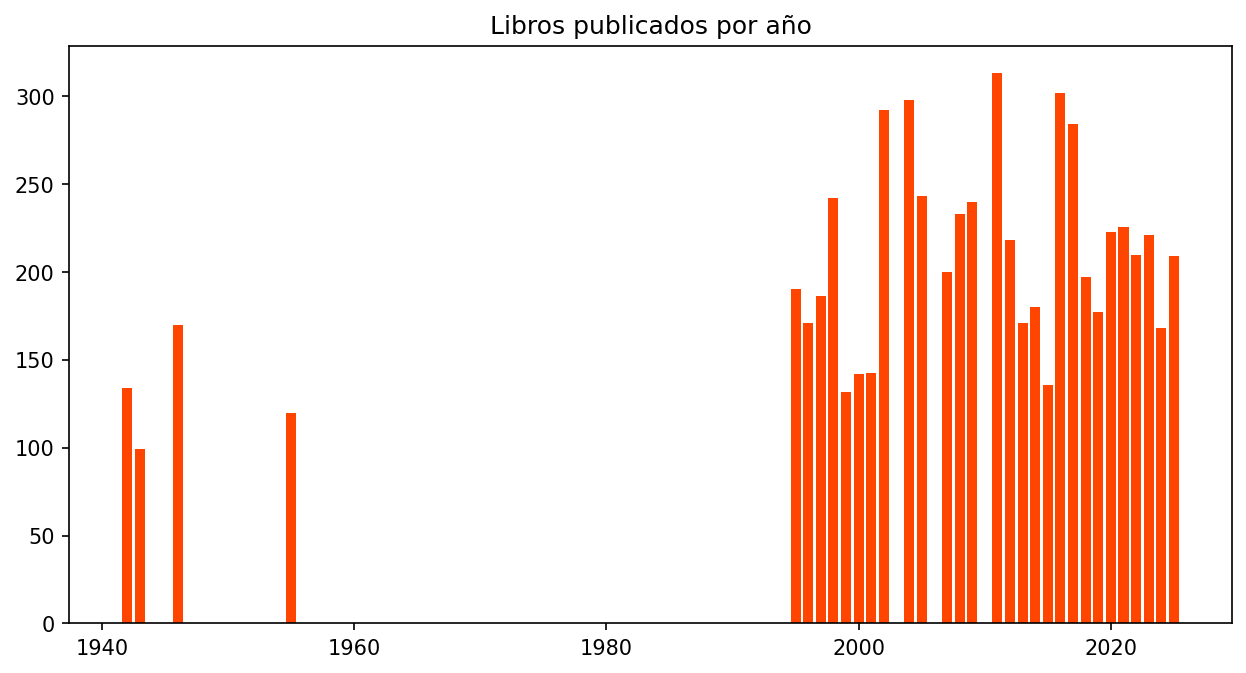

In [20]:
plt.figure(figsize=(10,5), dpi=150) 
plt.bar(df2.index,df2['Price'], color='orangered')
plt.title('Libros publicados por año')
plt.show()

# Limpieza y preparación de datos

En el proceso de análisis y modelado de datos, una de las etapas más demandantes en términos de tiempo es la preparación de los datos, la cual incluye tareas como la carga, limpieza, transformación, integración y reordenación de la información. Diversos estudios en ciencia de datos indican que estas actividades pueden consumir hasta el 80 % del tiempo total de un proyecto analítico.

La limpieza de datos implica identificar y corregir errores, valores faltantes, duplicados, y formatos inconsistentes. La transformación puede incluir la normalización, codificación de variables categóricas o la creación de nuevas variables derivadas. Estas tareas son fundamentales para garantizar la calidad, consistencia y utilidad analítica de los datos, y constituyen una etapa crítica antes de aplicar cualquier técnica estadística o de aprendizaje automático.


In [22]:
ruta = 'https://raw.githubusercontent.com/jamc88/AD-MCMAI/refs/heads/main/Datos/metro_ingresos.csv'
df = pd.read_csv(ruta,index_col=['fecha']) 

Datos: https://datos.cdmx.gob.mx/dataset/ingresos-del-sistema-de-transporte-colectivo-metro

In [23]:
df

,tipo_ingreso,linea,ingreso
fecha,,,
2022-01-01,Boletos,Línea 1,324825.0
2022-01-01,NaN,NaN,NaN
2022-01-01,NaN,NaN,180225.0
2022-01-01,Boletos,Línea 4,NaN
2022-01-01,NaN,Línea 5,134725.0
...,...,...,...
2022-12-31,QR/Validador,Línea 8,NaN
2022-12-31,NaN,Línea 9,7590.0
2022-12-31,QR/Validador,NaN,0.0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17532 entries, 2022-01-01 to 2022-12-31
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tipo_ingreso  17493 non-null  object 
 1   linea         17430 non-null  object 
 2   ingreso       17359 non-null  float64
dtypes: float64(1), object(2)
memory usage: 547.9+ KB


In [26]:
df.isna().sum()

tipo_ingreso     39
linea           102
ingreso         173
dtype: int64

**dropna** elimina por defecto cualquier fila que contiene un valor faltante:

In [27]:
df.dropna()

,tipo_ingreso,linea,ingreso
fecha,,,
2022-01-01,Boletos,Línea 1,324825.0
2022-01-01,Boletos,Línea A,163450.0
2022-01-01,Recargas,Línea 1,439332.5
2022-01-01,Recargas,Línea 2,369354.8
2022-01-01,Recargas,Línea 3,347269.8
...,...,...,...
2022-12-31,QR/Validador,Línea 1,0.0
2022-12-31,QR/Validador,Línea 2,0.0
2022-12-31,QR/Validador,Línea 4,0.0


Pasar **how='all'** quitará solamente las filas que sean todas nulas:

In [29]:
df.dropna(how='all') 

,tipo_ingreso,linea,ingreso
fecha,,,
2022-01-01,Boletos,Línea 1,324825.0
2022-01-01,NaN,NaN,180225.0
2022-01-01,Boletos,Línea 4,NaN
2022-01-01,NaN,Línea 5,134725.0
2022-01-01,Boletos,NaN,NaN
...,...,...,...
2022-12-31,QR/Validador,NaN,NaN
2022-12-31,QR/Validador,Línea 8,NaN
2022-12-31,NaN,Línea 9,7590.0


Supongamos que queremos mantener solo filas que contengan como máximo un cierto número de observaciones faltantes.

In [30]:
df.dropna(thresh = 2)

,tipo_ingreso,linea,ingreso
fecha,,,
2022-01-01,Boletos,Línea 1,324825.0
2022-01-01,Boletos,Línea 4,NaN
2022-01-01,NaN,Línea 5,134725.0
2022-01-01,Boletos,NaN,88100.0
2022-01-01,Boletos,Línea 8,NaN
...,...,...,...
2022-12-31,QR/Validador,Línea 6,NaN
2022-12-31,QR/Validador,Línea 8,NaN
2022-12-31,NaN,Línea 9,7590.0


En lugar de filtrar datos ausentes (y posiblemente arrastrar con ellos otros datos), quizá sea más conveniente rellenar los “huecos” de distintas maneras. Para la mayoría de los casos se debe emplear el método **fillna**.

In [32]:
df.fillna(0)

,tipo_ingreso,linea,ingreso
fecha,,,
2022-01-01,Boletos,Línea 1,324825.0
2022-01-01,0,0,0.0
2022-01-01,0,0,180225.0
2022-01-01,Boletos,Línea 4,0.0
2022-01-01,0,Línea 5,134725.0
...,...,...,...
2022-12-31,QR/Validador,Línea 8,0.0
2022-12-31,0,Línea 9,7590.0
2022-12-31,QR/Validador,0,0.0


Llamando a fillna con un diccionario se puede utilizar un valor de relleno distinto para cada columna:

In [33]:
df.fillna({'tipo_ingreso': 'otro', 
           'linea': 'x', 
           'ingreso':0})

,tipo_ingreso,linea,ingreso
fecha,,,
2022-01-01,Boletos,Línea 1,324825.0
2022-01-01,otro,x,0.0
2022-01-01,otro,x,180225.0
2022-01-01,Boletos,Línea 4,0.0
2022-01-01,otro,Línea 5,134725.0
...,...,...,...
2022-12-31,QR/Validador,Línea 8,0.0
2022-12-31,otro,Línea 9,7590.0
2022-12-31,QR/Validador,x,0.0


El método "forward fill" ("ffill"),hace que los valores no nulos se copien "hacia adelante" siempre que se encuentren valores nulos.

In [35]:
df.head()

,tipo_ingreso,linea,ingreso
fecha,,,
2022-01-01,Boletos,Línea 1,324825.0
2022-01-01,NaN,NaN,NaN
2022-01-01,NaN,NaN,180225.0
2022-01-01,Boletos,Línea 4,NaN
2022-01-01,NaN,Línea 5,134725.0


In [38]:
df.fillna(method='ffill')

,tipo_ingreso,linea,ingreso
fecha,,,
2022-01-01,Boletos,Línea 1,324825.0
2022-01-01,Boletos,Línea 1,324825.0
2022-01-01,Boletos,Línea 1,180225.0
2022-01-01,Boletos,Línea 4,180225.0
2022-01-01,Boletos,Línea 5,134725.0
...,...,...,...
2022-12-31,QR/Validador,Línea 8,0.0
2022-12-31,QR/Validador,Línea 9,7590.0
2022-12-31,QR/Validador,Línea 9,0.0


In [39]:
df['ingreso'].fillna(df['ingreso'].median())

fecha
2022-01-01    324825.0
2022-01-01      8805.0
2022-01-01    180225.0
2022-01-01      8805.0
2022-01-01    134725.0
                ...   
2022-12-31      8805.0
2022-12-31      7590.0
2022-12-31         0.0
2022-12-31      8805.0
2022-12-31         0.0
Name: ingreso, Length: 17532, dtype: float64

| **Argumento** | **Descripción** |
|--------------|-----------------|
| `value` | Valor escalar, serie, diccionario o DataFrame que se utiliza para reemplazar valores faltantes (`NaN`). Si se proporciona un diccionario, sus claves deben coincidir con las etiquetas del eje (columnas o filas). |
| `method` | Método de propagación de valores no nulos. Puede ser `'ffill'` (forward fill, hacia adelante) o `'bfill'` (backward fill, hacia atrás). No puede usarse junto con el argumento `value`. |
| `axis` | Eje a lo largo del cual se realizará el llenado. Puede ser `0` o `'index'` (por filas) o `1` o `'columns'` (por columnas). El valor predeterminado es `axis=0`. |
| `limit` | Número máximo de valores consecutivos a rellenar a lo largo del eje especificado. Si hay más valores consecutivos faltantes que el `limit`, se detiene el llenado. |
| `inplace` | Si se establece en `True`, realiza la operación en el DataFrame original sin devolver una copia. Por defecto es `False`. |
| `downcast` | Diccionario que permite convertir los tipos de datos a tipos más eficientes después del llenado, por ejemplo: `{'float': 'float32'}`. |


### Ingresos del Sistema de Transporte Colectivo Metro 



https://datos.cdmx.gob.mx/dataset/ingresos-del-sistema-de-transporte-colectivo-metro

In [40]:
ruta='ingresosstc_2023.csv'

In [41]:
df = pd.read_csv(ruta, parse_dates = True, index_col=['fecha']) 

In [42]:
df

,tipo_ingreso,linea,ingreso
fecha,,,
2012-01-01,Boletos,Línea 1,648825.0
2012-01-01,Boletos,Línea 2,657120.0
2012-01-01,Boletos,Línea 3,466803.0
2012-01-01,Boletos,Línea 4,60120.0
2012-01-01,Boletos,Línea 5,242280.0
...,...,...,...
2023-07-31,QR/Validador,Línea 8,0.0
2023-07-31,QR/Validador,Línea 9,11865.0
2023-07-31,QR/Validador,Línea A,0.0


In [49]:
I_22 = df.loc['2022-01':'2022-12']

In [48]:
I_22

,tipo_ingreso,linea,ingreso
fecha,,,
2022-01-01,Boletos,Línea 1,324825.0
2022-01-01,Boletos,Línea 2,302150.0
2022-01-01,Boletos,Línea 3,180225.0
2022-01-01,Boletos,Línea 4,44330.0
2022-01-01,Boletos,Línea 5,134725.0
...,...,...,...
2022-12-31,QR/Validador,Línea 8,0.0
2022-12-31,QR/Validador,Línea 9,7590.0
2022-12-31,QR/Validador,Línea A,0.0


In [50]:
I_22.isna().sum()

tipo_ingreso      0
linea             0
ingreso         152
dtype: int64

In [51]:
I_22 = I_22.fillna({'ingreso':0})

In [53]:
I_22.isna().sum()

tipo_ingreso    0
linea           0
ingreso         0
dtype: int64

### ¿Cuánto ingreso por línea durante el 2022?

In [55]:
I_22.groupby(['linea']).sum()

,tipo_ingreso,ingreso
linea,,
Línea 1,BoletosRecargasTarjetasQR/ValidaciónBoletosRec...,4.983695e+08
Línea 12,BoletosRecargasTarjetasQR/ValidaciónBoletosRec...,0.000000e+00
Línea 2,BoletosRecargasTarjetasQR/ValidaciónBoletosRec...,8.532467e+08
Línea 3,BoletosRecargasTarjetasQR/ValidaciónBoletosRec...,7.490837e+08
Línea 4,BoletosRecargasTarjetasQR/ValidaciónBoletosRec...,1.033785e+08
Línea 5,BoletosRecargasTarjetasQR/ValidaciónBoletosRec...,2.505107e+08
Línea 6,BoletosRecargasTarjetasQR/ValidaciónBoletosRec...,1.387673e+08
Línea 7,BoletosRecargasTarjetasQR/ValidaciónBoletosRec...,3.713697e+08
Línea 8,BoletosRecargasTarjetasQR/ValidaciónBoletosRec...,5.145702e+08


In [57]:
lineas = I_22.groupby(['linea']).sum()
lineas = lineas.sort_values(by=['ingreso'])

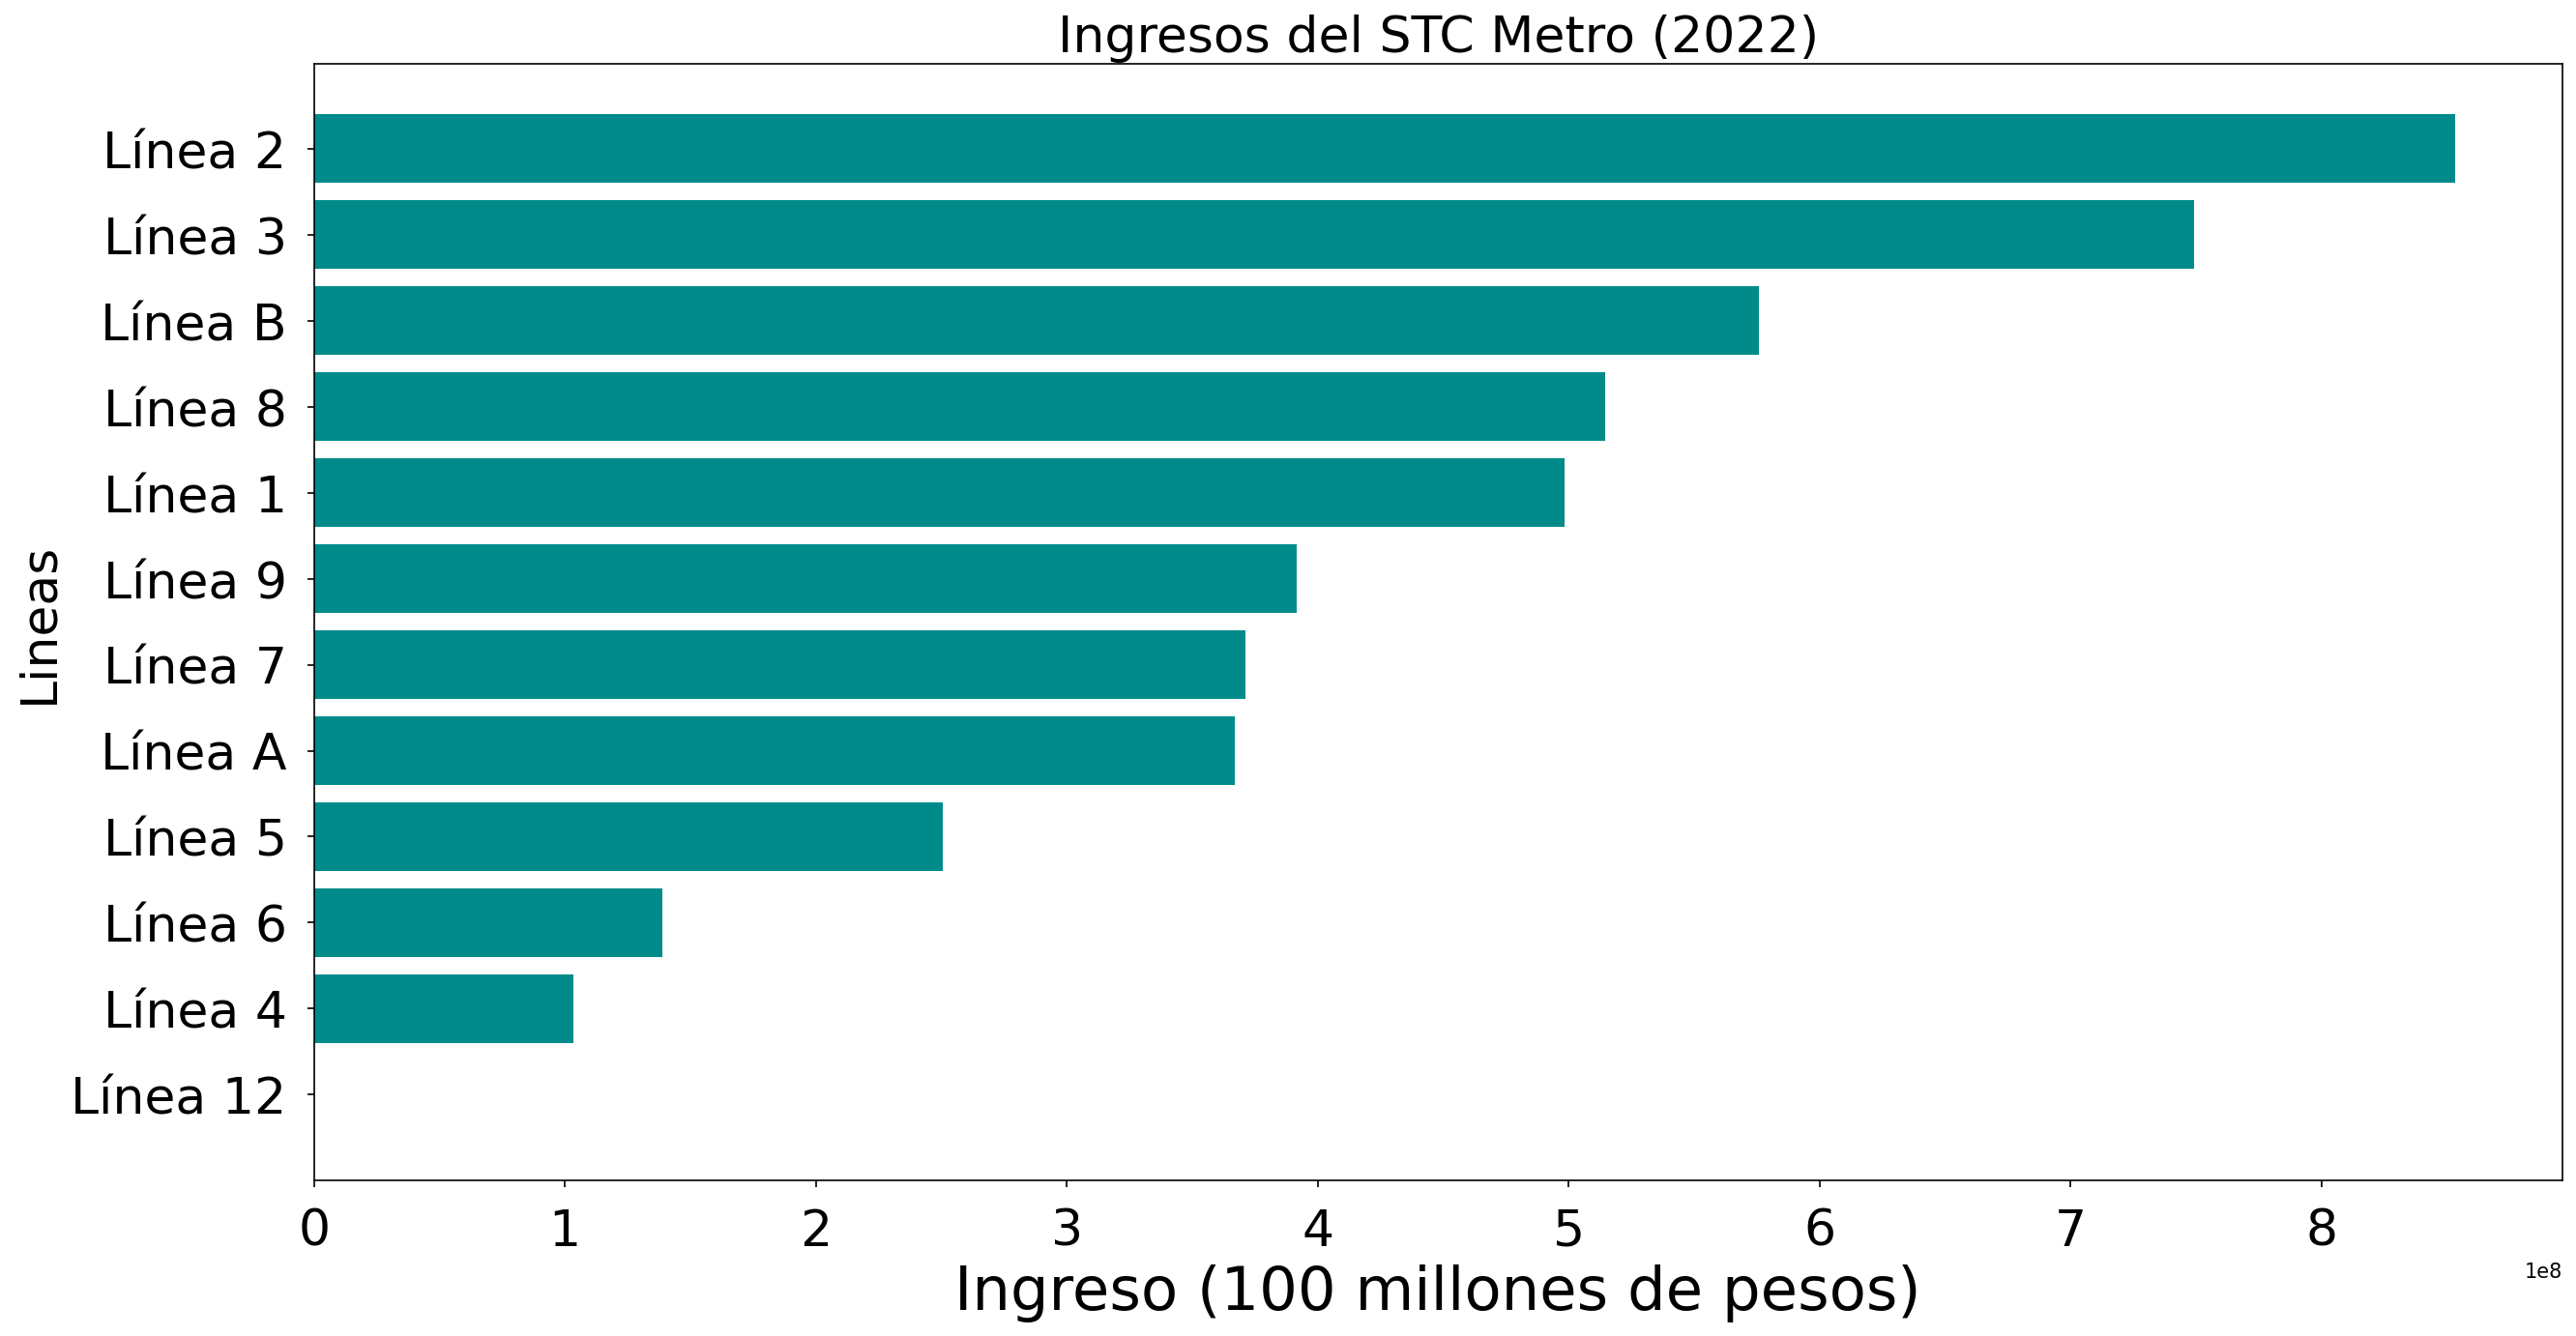

In [58]:
plt.figure(figsize=(20,10), dpi=150)
plt.barh(lineas.index,lineas["ingreso"], color='#008B8B')
plt.xlabel('Ingreso (100 millones de pesos)', fontdict = {'fontsize':30 })
plt.ylabel('Lineas',fontdict = {'fontsize':25 })
plt.title('Ingresos del STC Metro (2022)', fontsize = 25)
plt.tick_params(labelsize=25, pad=10)
plt.show()

### ¿Cuánto ingreso por cada categoría en cada línea durante el 2022?

In [59]:
I_22.groupby(['linea','tipo_ingreso']).sum()

ingreso
linea    tipo_ingreso               
Línea 1  Boletos        1.935986e+08
         QR/Validación  0.000000e+00
         QR/Validador   0.000000e+00
         Recargas       3.028067e+08
         Tarjetas       1.964235e+06
Línea 12 Boletos        0.000000e+00
         QR/Validación  0.000000e+00
         QR/Validador   0.000000e+00
         Recargas       0.000000e+00
         Tarjetas       0.000000e+00
Línea 2  Boletos        3.045251e+08
         QR/Validación  0.000000e+00
         QR/Validador   0.000000e+00
         Recargas       5.458772e+08
         Tarjetas       2.844420e+06
Línea 3  Boletos        2.307642e+08
         QR/Validación  0.000000e+00
         QR/Validador   0.000000e+00
         Recargas       5.158978e+08
         Tarjetas       2.421660e+06
Línea 4  Boletos        4.588458e+07
         QR/Validación  0.000000e+00
         QR/Validador   0.000000e+00
         Recargas       5.726947e+07
         Tarjetas       2.244600e+05
Línea 5  Boletos        9.737268e+07
         QR/Validación  0.000000e+00
         QR/Validador   0.000000e+00
         Recargas       1.522707e+08
         Tarjetas       8.673150e+05
Línea 6  Boletos        4.672255e+07
         QR/Validación  0.000000e+00
         QR/Validador   0.000000e+00
         Recargas       9.165376e+07
         Tarjetas       3.909600e+05
Línea 7  Boletos        1.072815e+08
         QR/Validación  0.000000e+00
         QR/Validador   0.000000e+00
         Recargas       2.630049e+08
         Tarjetas       1.083240e+06
Línea 8  Boletos        1.644456e+08
         QR/Validación  0.000000e+00
         QR/Validador   0.000000e+00
         Recargas       3.486327e+08
         Tarjetas       1.491855e+06
Línea 9  Boletos        1.160982e+08
         QR/Validación  3.949220e+06
         QR/Validador   4.111050e+05
         Recargas       2.696052e+08
         Tarjetas       1.419810e+06
Línea A  Boletos        1.406302e+08
         QR/Validación  0.000000e+00
         QR/Validador   0.000000e+00
         Recargas       2.253472e+08
         Tarjetas       9.696300e+05
Línea B  Boletos        2.180905e+08
         QR/Validación  0.000000e+00
         QR/Validador   0.000000e+00
         Recargas       3.562333e+08
         Tarjetas       1.568115e+06

In [61]:
linea_9 = I_22.groupby(['linea','tipo_ingreso']).sum().loc['Línea 9']

In [62]:
linea_9

,ingreso
tipo_ingreso,
Boletos,1.160982e+08
QR/Validación,3.949220e+06
QR/Validador,4.111050e+05
Recargas,2.696052e+08
Tarjetas,1.419810e+06


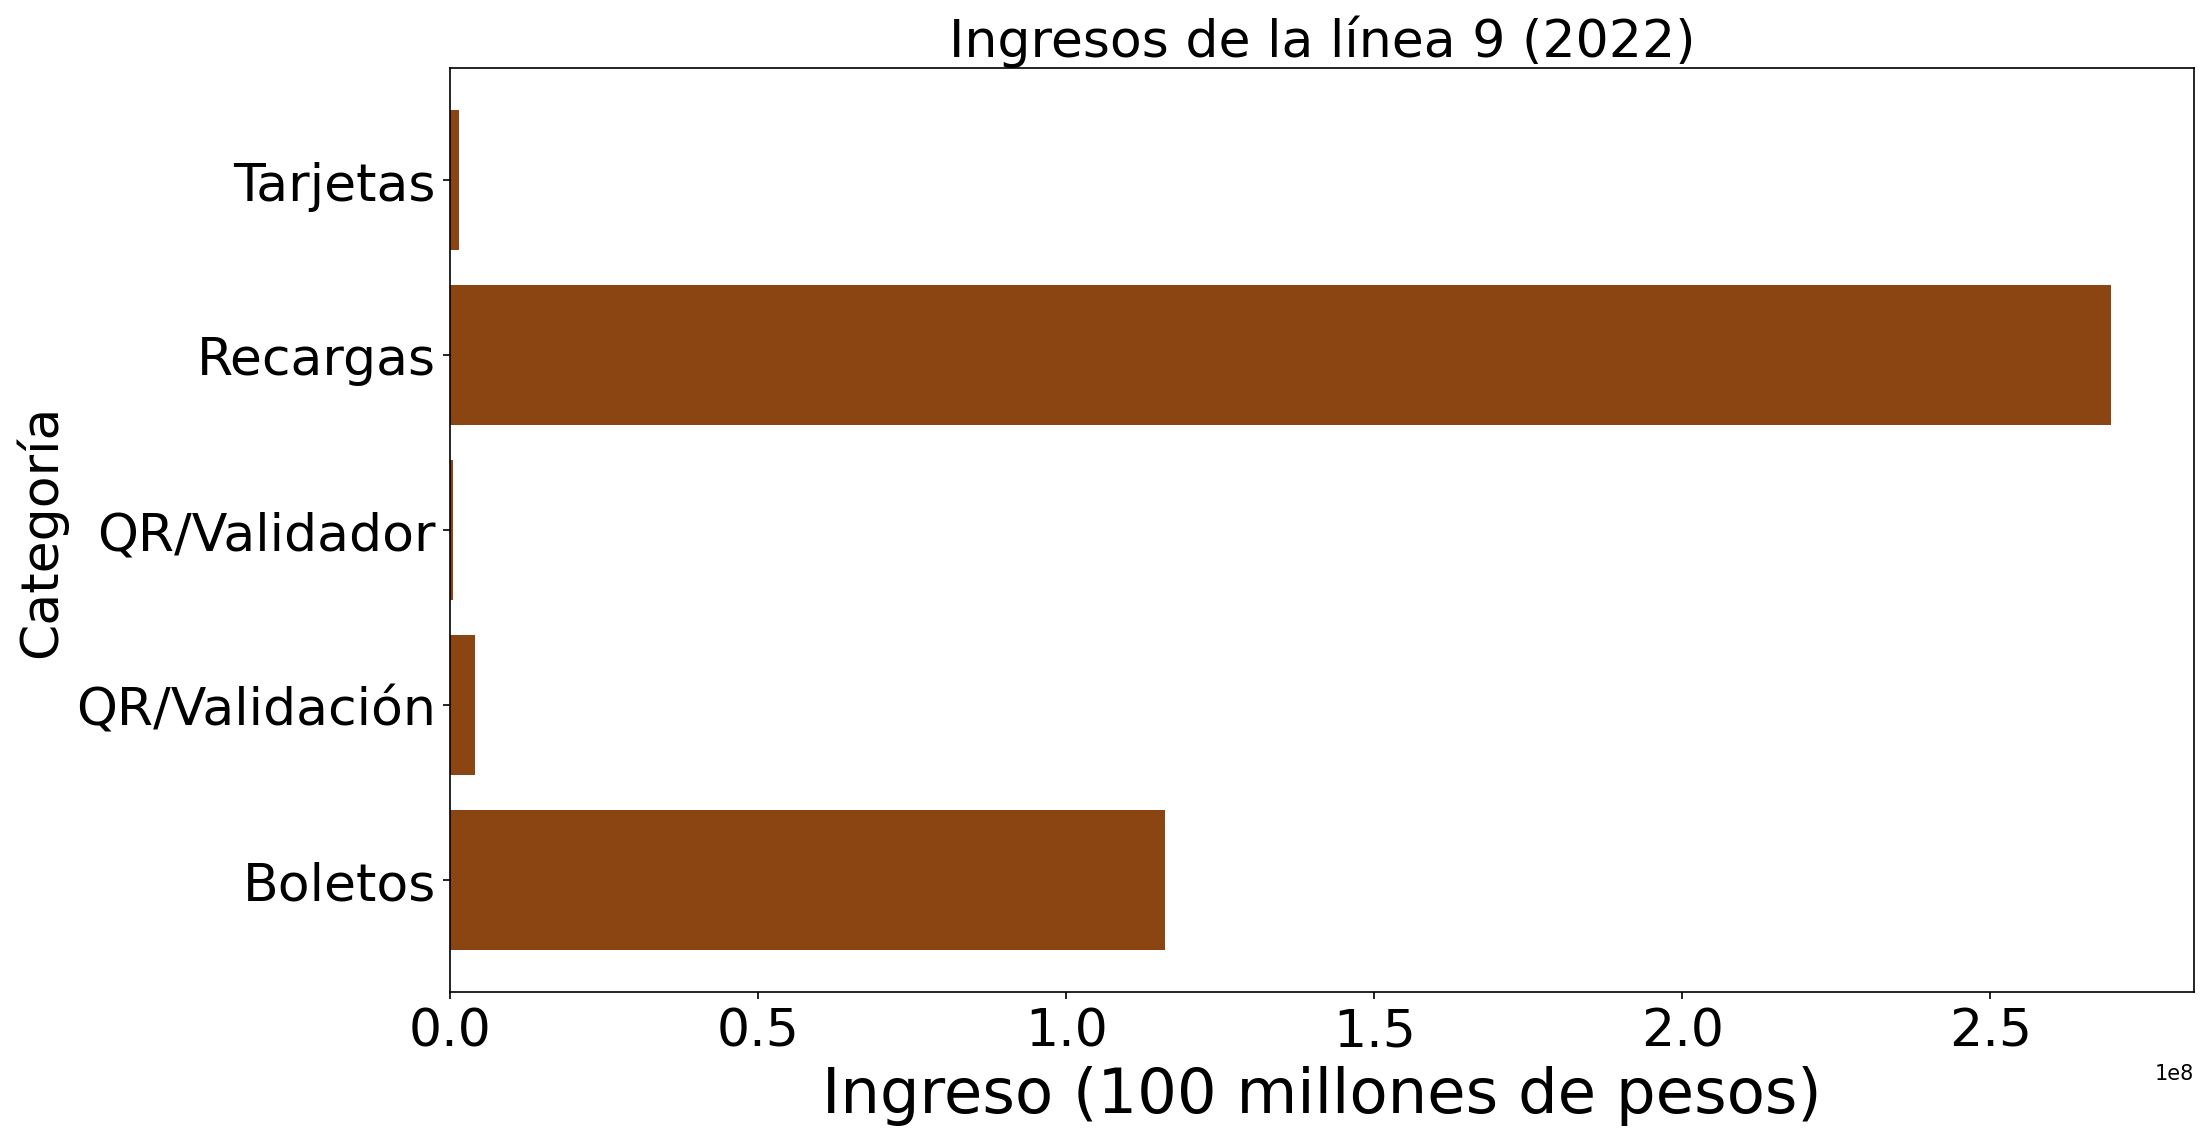

In [63]:
plt.figure(figsize=(15,8), dpi=150)
plt.barh(linea_9.index,linea_9["ingreso"], color='saddlebrown')
plt.xlabel('Ingreso (100 millones de pesos)', fontdict = {'fontsize':30 })
plt.ylabel('Categoría',fontdict = {'fontsize':25 })
plt.title('Ingresos de la línea 9 (2022)', fontsize = 25)
plt.tick_params(labelsize=25)
plt.show()

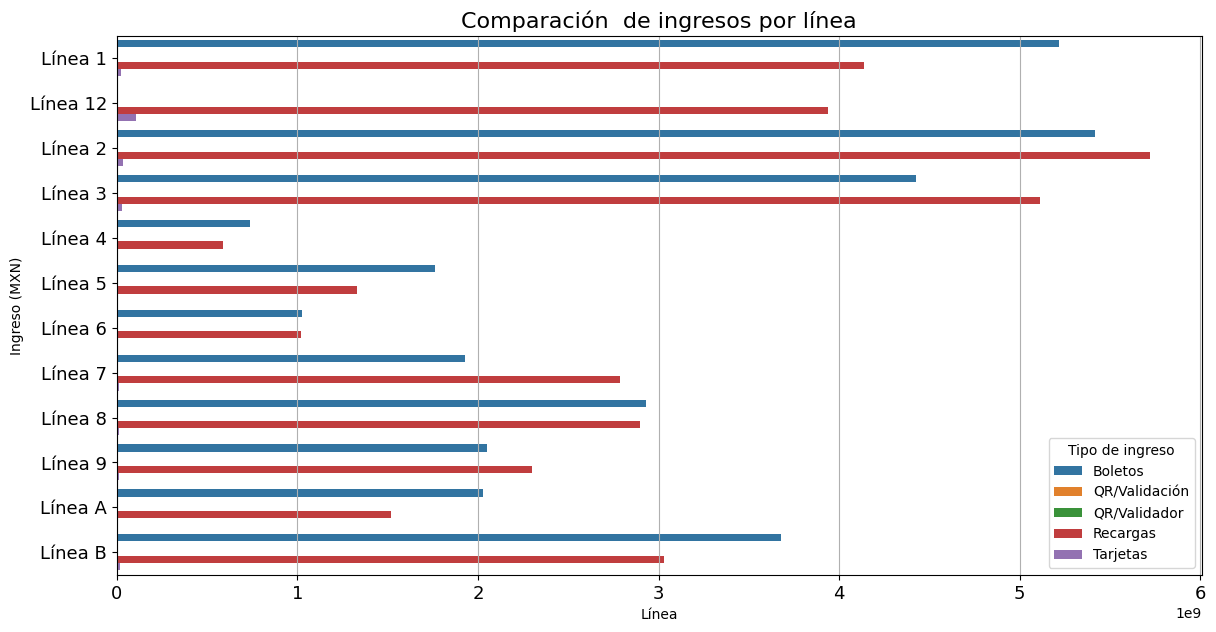

In [67]:
ingresos_tipo = df.groupby(['linea', 'tipo_ingreso'])['ingreso'].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(data=ingresos_tipo, x='ingreso', y='linea', 
            hue='tipo_ingreso')

plt.title('Comparación  de ingresos por línea', fontsize = 16)
plt.xlabel('Línea')
plt.ylabel('Ingreso (MXN)')
plt.tick_params(labelsize=13)
plt.legend(title='Tipo de ingreso')
plt.grid(axis='x')
plt.show()


#### Ingresos anuales de la línea 9

In [69]:
filtro = (df['linea']=='Línea 9')
df[filtro]

,tipo_ingreso,linea,ingreso
fecha,,,
2012-01-01,Boletos,Línea 9,176400.0
2012-01-01,Recargas,Línea 9,77192.0
2012-01-01,Tarjetas,Línea 9,690.0
2012-01-02,Boletos,Línea 9,504600.0
2012-01-02,Recargas,Línea 9,412813.0
...,...,...,...
2023-07-30,QR/Validador,Línea 9,6115.0
2023-07-31,Boletos,Línea 9,340500.0
2023-07-31,Recargas,Línea 9,1034567.6


In [70]:
in_9 = df[filtro]['ingreso']
in_9

fecha
2012-01-01     176400.0
2012-01-01      77192.0
2012-01-01        690.0
2012-01-02     504600.0
2012-01-02     412813.0
                ...    
2023-07-30       6115.0
2023-07-31     340500.0
2023-07-31    1034567.6
2023-07-31       5265.0
2023-07-31      11865.0
Name: ingreso, Length: 13329, dtype: float64

La función `resample()` en Pandas permite cambiar la frecuencia temporal de una serie de tiempo. Se utiliza para agrupar datos en periodos regulares (diarios, semanales, mensuales, etc.) y aplicar funciones como `sum()`, `mean()`, etc.

>  `resample()` solo funciona cuando el índice del DataFrame es de tipo `datetime`.


In [77]:
in_9.resample('Y').sum()

fecha
2012-12-31    3.034536e+08
2013-12-31    3.150598e+08
2014-12-31    4.347140e+08
2015-12-31    4.586915e+08
2016-12-31    4.532853e+08
2017-12-31    4.285456e+08
2018-12-31    4.198930e+08
2019-12-31    3.835926e+08
2020-12-31    2.466850e+08
2021-12-31    2.822645e+08
2022-12-31    3.914836e+08
2023-12-31    2.460342e+08
Freq: A-DEC, Name: ingreso, dtype: float64

| Código | Frecuencia          | Ejemplo          |
| ------ | ------------------- | ---------------- |
| `'D'`  | Diario              | 2023-01-01       |
| `'W'`  | Semanal             | 2023-01-08       |
| `'M'`  | Fin de mes          | 2023-01-31       |
| `'MS'` | Inicio de mes       | 2023-01-01       |
| `'Q'`  | Fin de trimestre    | 2023-03-31       |
| `'QS'` | Inicio de trimestre | 2023-01-01       |
| `'A'`  | Fin de año          | 2023-12-31       |
| `'AS'` | Inicio de año       | 2023-01-01       |
| `'H'`  | Cada hora           | 2023-01-01 01:00 |
| `'T'`  | Cada minuto         | 2023-01-01 00:01 |


In [79]:
ing = pd.DataFrame(in_9.resample('Y').sum())
ing

,ingreso
fecha,
2012-12-31,3.034536e+08
2013-12-31,3.150598e+08
2014-12-31,4.347140e+08
2015-12-31,4.586915e+08
2016-12-31,4.532853e+08
2017-12-31,4.285456e+08
2018-12-31,4.198930e+08
2019-12-31,3.835926e+08
2020-12-31,2.466850e+08


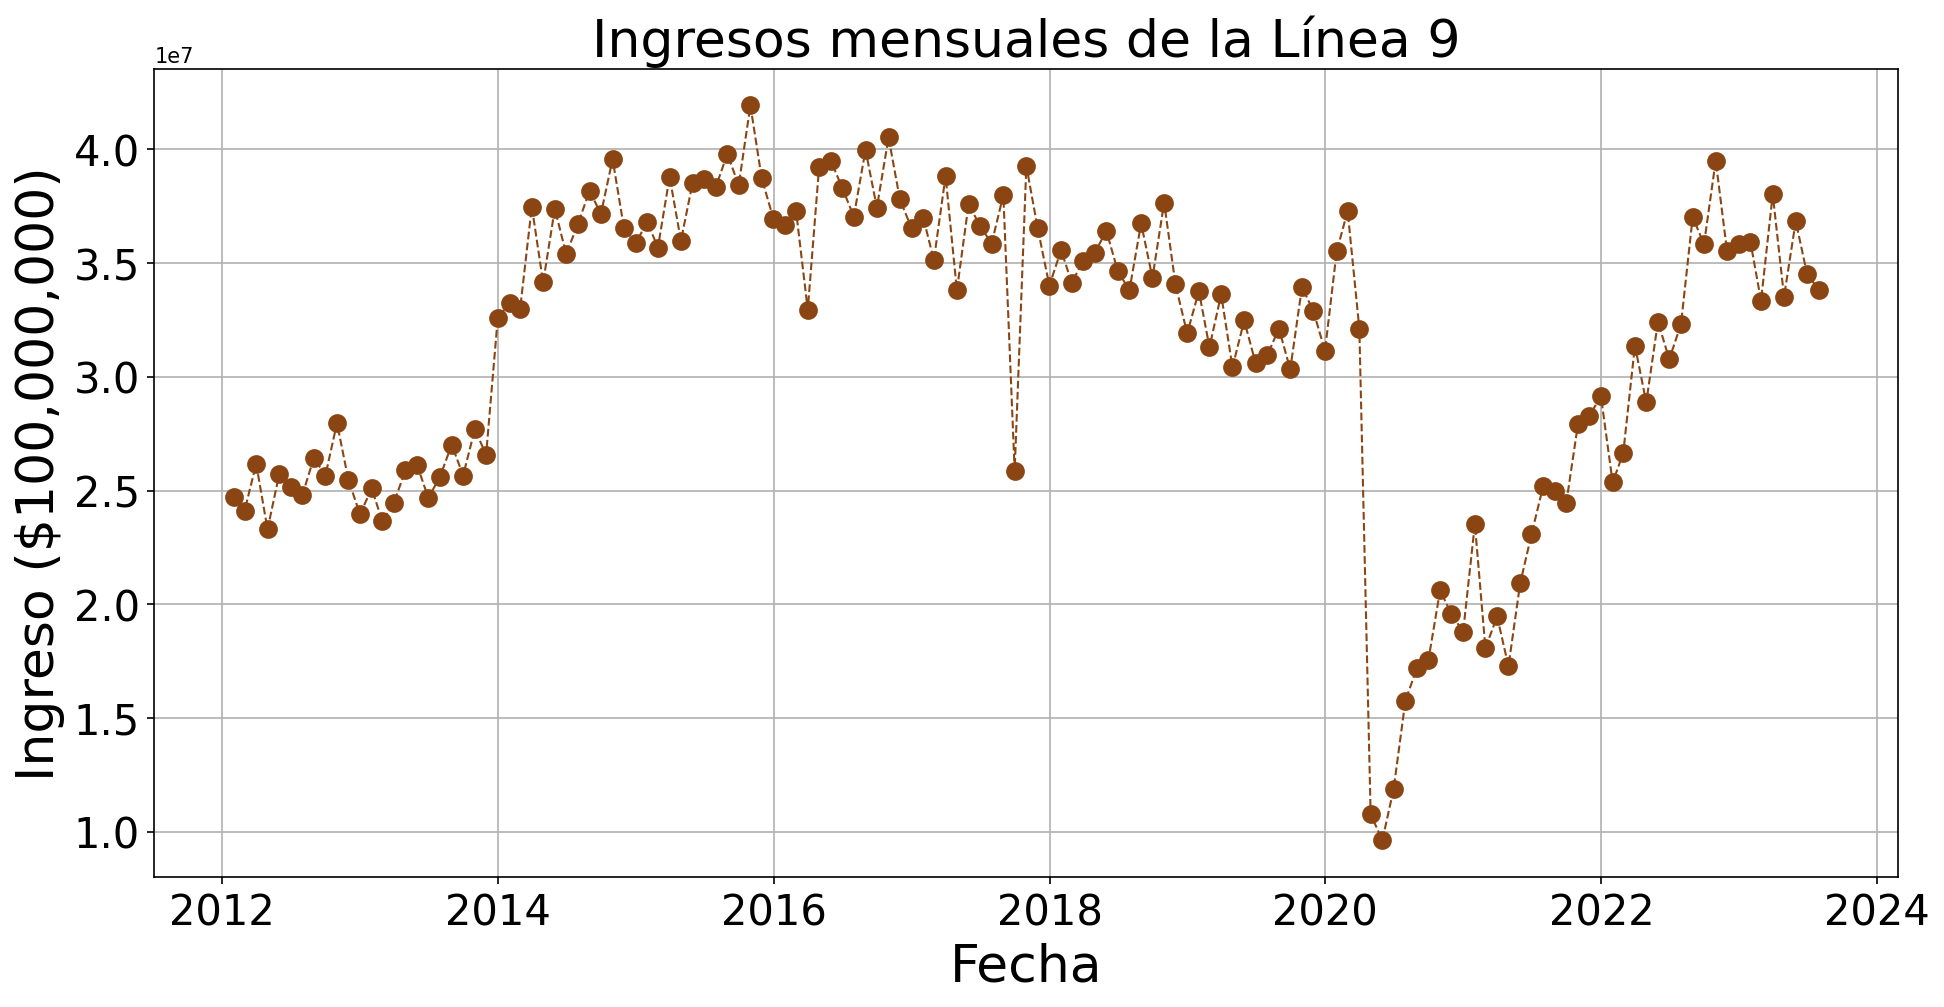

In [94]:
ing = pd.DataFrame(in_9.resample('M').sum())

plt.figure(figsize=(15,7), dpi=150)
plt.plot(ing['ingreso'],lw=1, color='saddlebrown',linestyle='dashed', 
         marker='o',markersize=8)

plt.title('Ingresos mensuales de la Línea 9', fontsize = 25)
plt.xlabel('Fecha', fontdict = {'fontsize':25 })
plt.ylabel('Ingreso ($100,000,000)',fontdict = {'fontsize':25 })
plt.tick_params(labelsize=20)
plt.grid(True)

#### `linestyle` – Estilo de línea

| Código     | Descripción         |
|------------|---------------------|
| `'solid'`  | Línea sólida (default) |
| `'dashed'` | Línea discontinua     |
| `'dashdot'`| Línea guión-punto     |
| `'dotted'` | Línea punteada        |
| `'-'`      | Igual a `'solid'`     |
| `'--'`     | Igual a `'dashed'`    |
| `'-.'`     | Igual a `'dashdot'`   |
| `':'`      | Igual a `'dotted'`    |

---

#### `marker` – Estilo de marcador

| Código | Descripción        |
|--------|--------------------|
| `'o'`  | Círculo            |
| `'s'`  | Cuadrado           |
| `'^'`  | Triángulo arriba   |
| `'v'`  | Triángulo abajo    |
| `'<'`  | Triángulo izquierda|
| `'>'`  | Triángulo derecha  |
| `'*'`  | Estrella           |
| `'D'`  | Diamante           |
| `'x'`  | Cruz inclinada     |
| `'+'`  | Cruz               |
| `'.'`  | Punto              |
| `'|'`  | Línea vertical     |
| `'_'`  | Línea horizontal   |


#### ¿Cuál fue el ingreso por año de todo el sistema del metro?

In [90]:
df

,tipo_ingreso,linea,ingreso
fecha,,,
2012-01-01,Boletos,Línea 1,648825.0
2012-01-01,Boletos,Línea 2,657120.0
2012-01-01,Boletos,Línea 3,466803.0
2012-01-01,Boletos,Línea 4,60120.0
2012-01-01,Boletos,Línea 5,242280.0
...,...,...,...
2023-07-31,QR/Validador,Línea 8,0.0
2023-07-31,QR/Validador,Línea 9,11865.0
2023-07-31,QR/Validador,Línea A,0.0


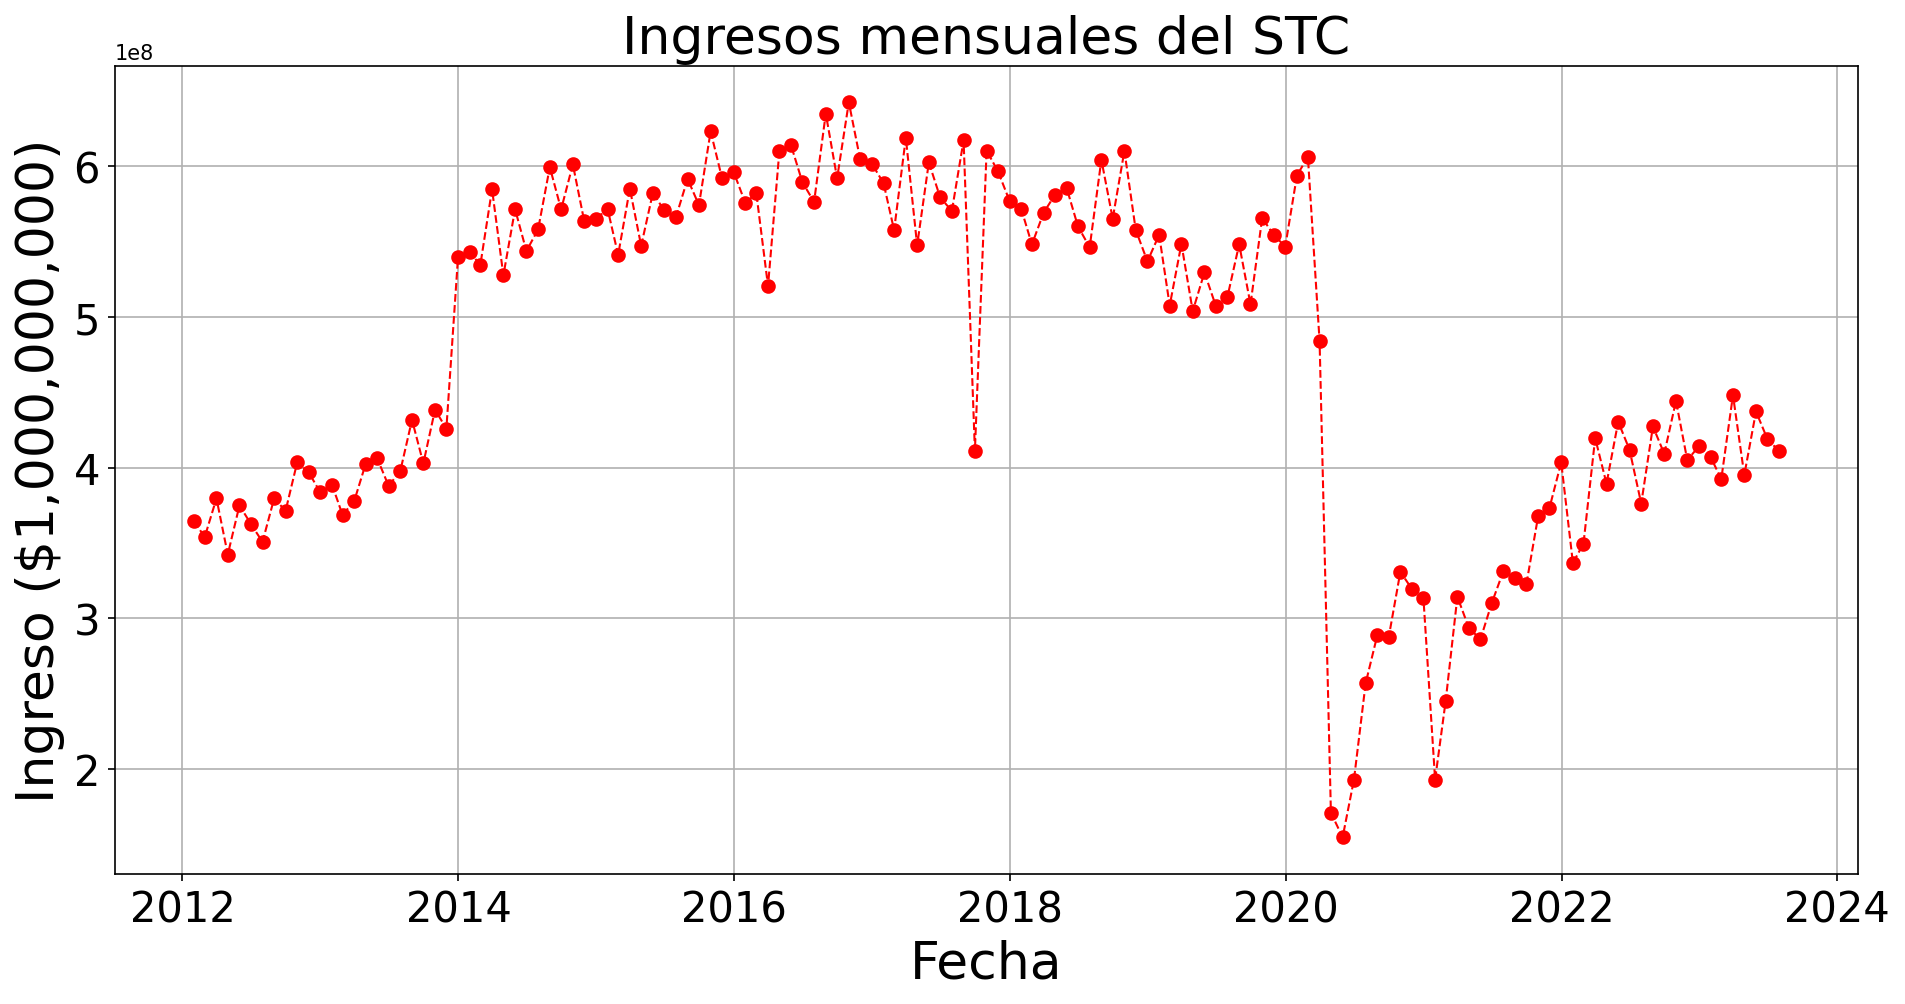

In [101]:
ing = pd.DataFrame(df.resample('M')['ingreso'].sum())

plt.figure(figsize=(15,7), dpi=150)
plt.plot(ing['ingreso'],lw=1, color='red',linestyle='dashed', 
         marker='o',markersize=6)

plt.title('Ingresos mensuales del STC', fontsize = 25)
plt.xlabel('Fecha', fontdict = {'fontsize':25 })
plt.ylabel('Ingreso ($1,000,000,000)',fontdict = {'fontsize':25 })
plt.tick_params(labelsize=20)
plt.grid(True)